In [1]:
from main import *

## Gun Modelv2 non sym

In [ ]:

#DirList=["OCC_Gun_modelv2_nonsym_StainSt/al_0.01_mu_1,20_sig_1.45e6,4.5e6/1e1-1e8_100_el_26657_ord_4_POD_13_1e-6/Data/"]
#    "OCC_Gun_modelv2_nonsym_StainSt/al_0.01_mu_1,20_sig_1.45e6,4.5e6/1e1-1e8_100_el_26657_ord_4_POD_13_1e-6/Data/"]
#DirList=["OCC_Gun_modelv2_nonsym_al/al_0.01_mu_1,1_sig_3.5e7,3.5e7/1e1-1e8_40_el_26657_ord_2_POD_13_1e-6/Data/"]

SaveRIList=[]
SaveRtilde=[]

MaxOmega=1e8
p=2
mu=20

directory="OCC_Gun_modelv2_nonsym_StainSt/al_0.01_mu_1,"+str(mu)+"_sig_1.45e6,4.5e6/1e1-1e8_100_el_26657_ord_"+str(p)+"_POD_13_1e-6/Data/"
print(directory)
RIResults,RtildeIResults, N0IResults=main(directory,MaxOmega,Figures="On")    
SaveRIList=[]
SaveRtilde=[]



OCC_Gun_modelv2_nonsym_StainSt/al_0.01_mu_1,20_sig_1.45e6,4.5e6/1e1-1e8_100_el_26657_ord_2_POD_13_1e-6/Data/
Opening files from this path =  OCC_Gun_modelv2_nonsym_StainSt/al_0.01_mu_1,20_sig_1.45e6,4.5e6/1e1-1e8_100_el_26657_ord_2_POD_13_1e-6/Data/


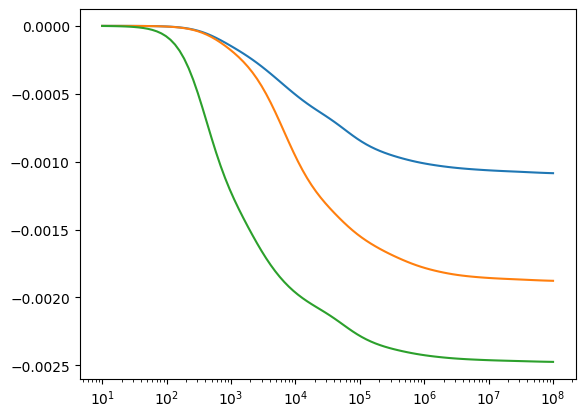

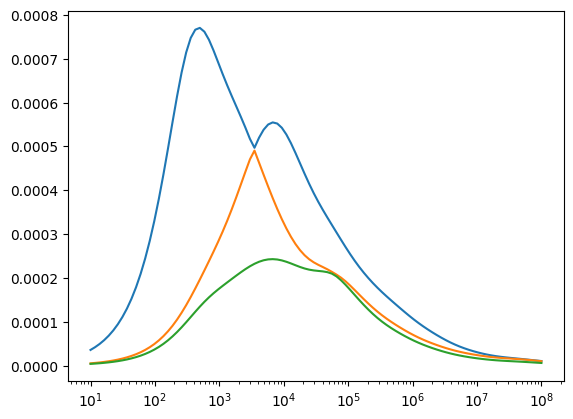

In [3]:
Frequencies=RIResults["Frequencies"]
URstore=RIResults["URstore"]
plt.figure()
for n in range(3):
    plt.semilogx(Frequencies,URstore[:,n])
UIstore=RIResults["UIstore"]
plt.figure()
for n in range(3):
    plt.semilogx(Frequencies,UIstore[:,n])


dict_keys(['Frequencies', 'MinAnglestoreRI', 'AnglestoreRIfmeasapprxconstsortedmaxdiff_max', 'AnglestoreRIfmeasapprxconstsortedmindiff_min', 'AnglestoreRIfmeasapprxconstsortedmaxdiff_min', 'AnglestoreRIfmeasapprxconstsortedmindiff_max', 'dFMinAnglestoreRI', 'dFMaxAnglestoreRI', 'AnglestoreRIcommeasapprxconstsortedmaxdiff_max', 'AnglestoreRIcommeasapprxconstsortedmindiff_min', 'AnglestoreRIcommeasapprxconstsortedmaxdiff_min', 'AnglestoreRIcommeasapprxconstsortedmindiff_max', 'RIfmeasapprx_den_const_max', 'RIfmeasapprx_den_const_min', 'RIcommeapprx_den_const_max', 'RIcommeapprx_den_const_min', 'URstore', 'UIstore', 'URtildestore', 'UN0store', 'QRstore', 'QIstore', 'QRtildestore', 'QN0store', 'AnglestoreRIfmeasfullconstsortedmindiff', 'AnglestoreRIfmeasfullconstsortedmaxdiff', 'AnglestoreRIcommeasfullconstsortedmindiff', 'AnglestoreRIcommeasfullconstsortedmaxdiff'])


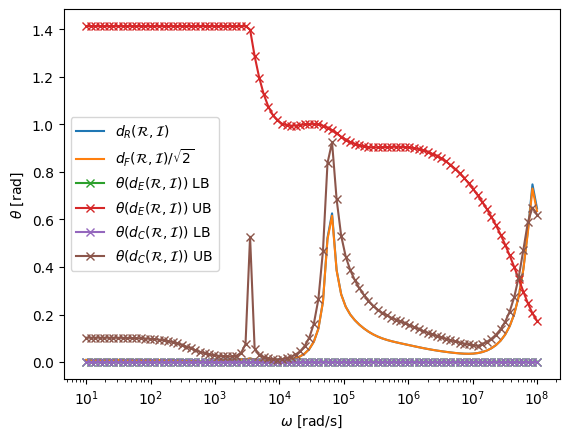

In [5]:
print(RIResults.keys())

Frequencies=RIResults["Frequencies"]
MinAnglestoreRI=RIResults["MinAnglestoreRI"]
AnglestoreRIfmeasapprxconstsortedmaxdiff_max=np.fmin(RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_max"],
                                                     np.fmin(RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_min"],
                                                     np.fmin(RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_max"],
                                                     RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_min"])))
AnglestoreRIfmeasapprxconstsortedmindiff_min=np.fmax(RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_min"])

#AnglestoreRIfmeasapprxconstsortedmindiff_min=np.fmin(RIResults["AnglestoreRIfmeasfullconstsortedmindiff"],RIResults["AnglestoreRIfmeasfullconstsortedmaxdiff"])
#AnglestoreRIfmeasapprxconstsortedmaxdiff_max=np.fmax(RIResults["AnglestoreRIfmeasfullconstsortedmaxdiff"],RIResults["AnglestoreRIfmeasfullconstsortedmindiff"])
#AnglestoreRIfmeasapprxconstsortedmindiff_min=RIResults["AnglestoreRIfmeasfullconstsortedmindiff"]
#AnglestoreRIfmeasapprxconstsortedmaxdiff_max=RIResults["AnglestoreRIfmeasfullconstsortedmaxdiff"]


AnglestoreRIcommeasapprxconstsortedmaxdiff_max=np.fmin(RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_min"])
AnglestoreRIcommeasapprxconstsortedmindiff_min=np.fmax(RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_min"])

#AnglestoreRIcommeasapprxconstsortedmaxdiff_max=np.fmin(RIResults["AnglestoreRIcommeasfullconstsortedmaxdiff"],RIResults["AnglestoreRIcommeasfullconstsortedmindiff"])
#AnglestoreRIcommeasapprxconstsortedmindiff_min=np.fmax(RIResults["AnglestoreRIcommeasfullconstsortedmaxdiff"],RIResults["AnglestoreRIcommeasfullconstsortedmindiff"])


#AnglestoreRIfmeasupper=np.fmax(RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_min"])
#AnglestoreRIfmeaslower=np.fmin(RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_min"])

#AnglestoreRIfmeasupper=np.fmax(AnglestoreRIfmeasupper,RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_min"])
#AnglestoreRIfmeaslower=np.fmin(AnglestoreRIfmeaslower,np.fmin(RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_min"]))
#AnglestoreRIfmeasavg=(AnglestoreRIfmeasupper+AnglestoreRIfmeaslower)/2

#AnglestoreRIcommmupper=np.fmax(RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_min"])
#AnglestoreRIcommmlower=np.fmin(RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_min"])
#AnglestoreRIcommmavg = (AnglestoreRIcommmupper+AnglestoreRIcommmlower )/2

#AnglestoreRIcommmupper=np.fmax(AnglestoreRIcommmupper,RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_min"])
#AnglestoreRIcommmlower=np.fmin(AnglestoreRIcommmlower,RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_min"])
#AnglestoreRIcommmavg = (AnglestoreRIcommmupper+AnglestoreRIcommmlower )/2



dFMinAnglestoreRI = RIResults["dFMinAnglestoreRI"]
fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreRI,label=r'$d_R({\cal R},{\cal I})$')
plt.semilogx(Frequencies,dFMinAnglestoreRI/np.sqrt(2),label=r'$d_F({\cal R},{\cal I})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreRIfmeasapprxconstsortedmaxdiff_max,'-x',label=r'$\theta(d_E({\cal R},{\cal I}))$ LB')
plt.semilogx(Frequencies,AnglestoreRIfmeasapprxconstsortedmindiff_min,'-x',label=r'$\theta(d_E({\cal R},{\cal I}))$ UB')

plt.semilogx(Frequencies,AnglestoreRIcommeasapprxconstsortedmaxdiff_max,'-x',label=r'$\theta(d_C({\cal R},{\cal I}))$ LB')
plt.semilogx(Frequencies,AnglestoreRIcommeasapprxconstsortedmindiff_min,'-x',label=r'$\theta(d_C({\cal R},{\cal I}))$ UB')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
#plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_RI_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")
plt.show()

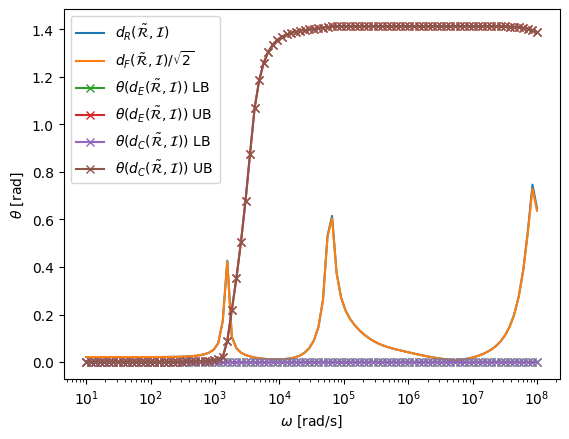

In [6]:

Frequencies=RtildeIResults["Frequencies"]
MinAnglestoreRtildeI=RtildeIResults["MinAnglestoreRtildeI"]
dFMinAnglestoreRtildeI = RtildeIResults["dFMinAnglestoreRtildeI"]
AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max=np.fmin(RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_min"])
AnglestoreRtildeIfmeasapprxconstsortedmindiff_min=np.fmax(RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_min"])

#AnglestoreRtildeIfmeasupper=np.fmax(RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_max"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_min"])
#AnglestoreRtildeIfmeaslower=np.fmin(RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_max"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_min"])

#AnglestoreRtildeIfmeasupper=np.fmax(AnglestoreRtildeIfmeasupper,RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_min"])
#AnglestoreRtildeIfmeaslower=np.fmin(AnglestoreRtildeIfmeaslower,RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_min"])

#AnglestoreRtildeIfmeasavg=(AnglestoreRtildeIfmeasupper+AnglestoreRtildeIfmeaslower)/2

#AnglestoreRtildeIfmeasfullconstsortedmindiff= RtildeIResults["AnglestoreRtildeIfmeasfullconstsortedmindiff"]

#AnglestoreRtildeIcommmupper=np.fmax(RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_min"])
#AnglestoreRtildeIcommmlower=np.fmin(RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_min"])

#AnglestoreRtildeIcommmupper=np.fmax(AnglestoreRtildeIcommmupper,RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_max"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_min"])
#AnglestoreRtildeIcommmlower=np.fmin(AnglestoreRtildeIcommmlower,RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_max"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_min"])


#AnglestoreRtildeIcommmavg = (AnglestoreRtildeIcommmupper+AnglestoreRtildeIcommmlower )/2

AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max=np.fmin(RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_min"])
AnglestoreRtildeIcommeasapprxconstsortedmindiff_min=np.fmax(RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_min"])

fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreRtildeI,label=r'$d_R(\tilde{\cal R},{\cal I})$')
plt.semilogx(Frequencies,dFMinAnglestoreRtildeI/np.sqrt(2),label=r'$d_F(\tilde{\cal R},{\cal I})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max,'-x',label=r'$\theta(d_E(\tilde{\cal R},{\cal I}))$ LB')
plt.semilogx(Frequencies,AnglestoreRtildeIfmeasapprxconstsortedmindiff_min,'-x',label=r'$\theta(d_E(\tilde{\cal R},{\cal I}))$ UB')

plt.semilogx(Frequencies,AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max,'-x',label=r'$\theta(d_C(\tilde{\cal R},{\cal I}))$ LB ')
plt.semilogx(Frequencies,AnglestoreRtildeIfmeasapprxconstsortedmindiff_min,'-x',label=r'$\theta(d_C(\tilde{\cal R},{\cal I}))$ UB ')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
#plt.ylim(0,0.2)
plt.legend()
#plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_RtildeI_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")
plt.show()

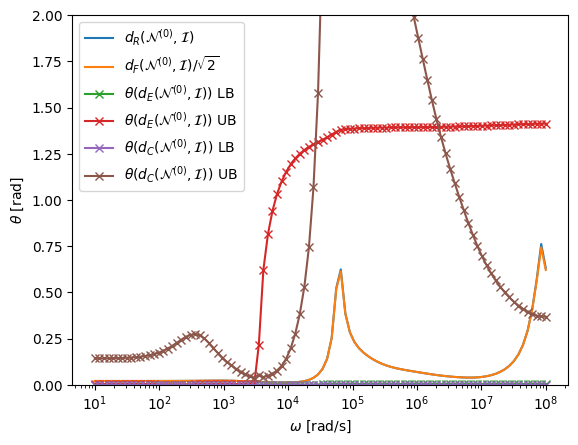

In [7]:

Frequencies=N0IResults["Frequencies"]
MinAnglestoreN0I=N0IResults["MinAnglestoreN0I"]
AnglestoreN0Ifmeasapprxconstsortedmaxdiff_max=np.fmin(N0IResults["AnglestoreN0Ifmeasapprxconstsortedmaxdiff_max"],N0IResults["AnglestoreN0Ifmeasapprxconstsortedmindiff_min"])
AnglestoreN0Ifmeasapprxconstsortedmindiff_min=np.fmax(N0IResults["AnglestoreN0Ifmeasapprxconstsortedmaxdiff_max"],N0IResults["AnglestoreN0Ifmeasapprxconstsortedmindiff_min"])

AnglestoreN0Icommeasapprxconstsortedmaxdiff_max=np.fmin(N0IResults["AnglestoreN0Icommeasapprxconstsortedmaxdiff_max"],N0IResults["AnglestoreN0Icommeasapprxconstsortedmindiff_min"])
AnglestoreN0Icommeasapprxconstsortedmindiff_min=np.fmax(N0IResults["AnglestoreN0Icommeasapprxconstsortedmaxdiff_max"],N0IResults["AnglestoreN0Icommeasapprxconstsortedmindiff_min"])


dFMinAnglestoreN0I = N0IResults["dFMinAnglestoreN0I"]
fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreN0I,label=r'$d_R({\cal N}^{(0)},{\cal I})$')
plt.semilogx(Frequencies,dFMinAnglestoreN0I/np.sqrt(2),label=r'$d_F({\cal N}^{(0)},{\cal I})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreN0Ifmeasapprxconstsortedmaxdiff_max,'x-',label=r'$\theta(d_E({\cal N}^{(0)},{\cal I}))$ LB')
plt.semilogx(Frequencies,AnglestoreN0Ifmeasapprxconstsortedmindiff_min,'x-',label=r'$\theta(d_E({\cal N}^{(0)},{\cal I}))$ UB')

plt.semilogx(Frequencies,AnglestoreN0Icommeasapprxconstsortedmaxdiff_max,'x-',label=r'$\theta(d_C({\cal N}^{(0)},{\cal I}))$ LB ')
plt.semilogx(Frequencies,AnglestoreN0Icommeasapprxconstsortedmindiff_min,'x-',label=r'$\theta(d_C({\cal N}^{(0)},{\cal I}))$ UB ')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.ylim(0,2)
plt.legend()
#plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_N0I_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")


plt.show()

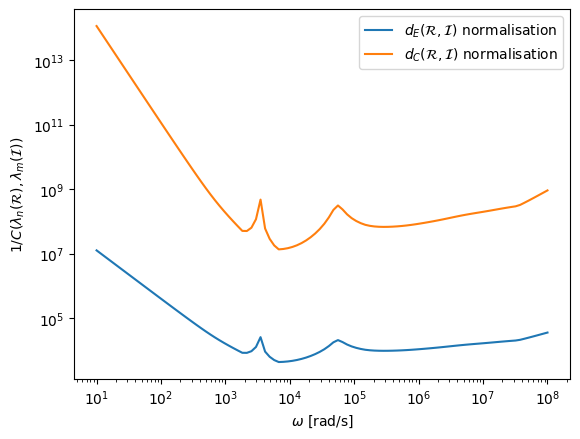

In [9]:
Frequencies=RIResults["Frequencies"]
RIcommeapprx_den_const=np.fmin(RIResults["RIcommeapprx_den_const_max"],RIResults["RIcommeapprx_den_const_min"])
RIfmeasapprx_den_const=np.fmin(RIResults["RIfmeasapprx_den_const_max"],RIResults["RIfmeasapprx_den_const_min"])



dFMinAnglestoreRI = RIResults["dFMinAnglestoreRI"]
fig=plt.figure()
plt.loglog(Frequencies,1/RIfmeasapprx_den_const,label=r'$d_E({\cal R},{\cal I})$ normalisation')
plt.loglog(Frequencies,1/RIcommeapprx_den_const,label=r'$d_C({\cal R},{\cal I})$ normalisation')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$1/C(\lambda_n({\cal R}),\lambda_m({\cal I}))$')
plt.legend()
#plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_RI_den_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")
plt.show()

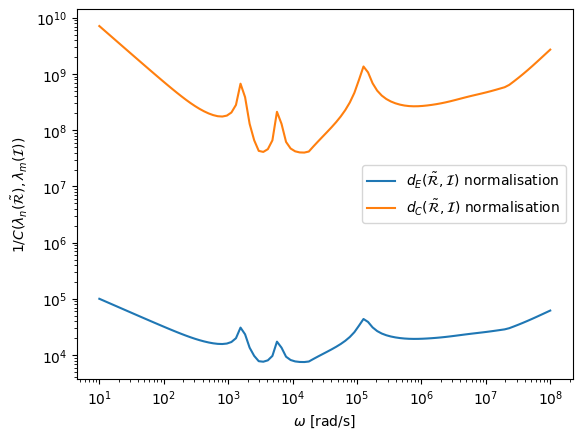

In [9]:
Frequencies=RtildeIResults["Frequencies"]
RtildeIcommeapprx_den_const=np.fmin(RtildeIResults["RtildeIcommeapprx_den_const_max"],RtildeIResults["RtildeIcommeapprx_den_const_min"])
RtildeIfmeasapprx_den_const=np.fmin(RtildeIResults["RtildeIfmeasapprx_den_const_max"],RtildeIResults["RtildeIfmeasapprx_den_const_min"])

fig=plt.figure()
plt.loglog(Frequencies,1/RtildeIfmeasapprx_den_const,label=r'$d_E(\tilde{\cal R},{\cal I})$ normalisation')
plt.loglog(Frequencies,1/RtildeIcommeapprx_den_const,label=r'$d_C(\tilde{\cal R},{\cal I})$ normalisation')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$1/C(\lambda_n(\tilde{\cal R}),\lambda_m({\cal I}))$')
plt.legend()
plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_Rtilde0I_den_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")
plt.show()

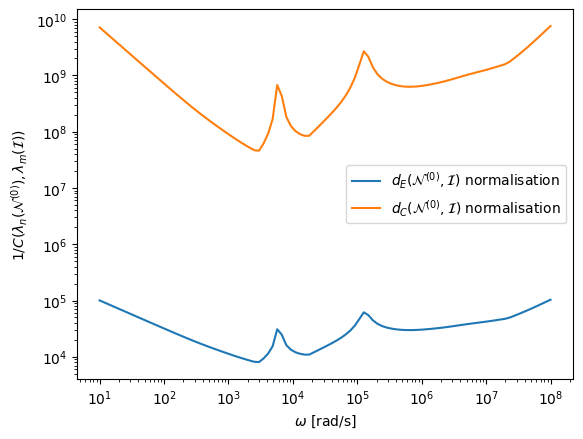

In [10]:
Frequencies=RIResults["Frequencies"]
N0Icommeapprx_den_const=np.fmin(N0IResults["N0Icommeapprx_den_const_max"],N0IResults["N0Icommeapprx_den_const_min"])
N0Ifmeasapprx_den_const=np.fmin(N0IResults["N0Ifmeasapprx_den_const_max"],N0IResults["N0Ifmeasapprx_den_const_min"])

fig=plt.figure()
plt.loglog(Frequencies,1/N0Ifmeasapprx_den_const,label=r'$d_E({\cal N}^{(0)},{\cal I})$ normalisation')
plt.loglog(Frequencies,1/N0Icommeapprx_den_const,label=r'$d_C({\cal N}^{(0)},{\cal I})$ normalisation')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$1/C(\lambda_n({\cal N}^{(0)}),\lambda_m({\cal I}))$')
plt.legend()
plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_N0I_den_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")
plt.show()